In [1]:
import data_utils
import cv2
import numpy as np

maxComponents = 10

size, images = data_utils.load(img_count=10)
images = np.array(images)

In [2]:
'''mean, eigenVectors = cv2.PCACompute(images, None, cv2.PCA_DATA_AS_COL, maxComponents)

average = mean[0]
average = average.reshape(size)
print(average.shape)'''

'mean, eigenVectors = cv2.PCACompute(images, None, cv2.PCA_DATA_AS_COL, maxComponents)\n\naverage = mean[0]\naverage = average.reshape(size)\nprint(average.shape)'

In [3]:
'''import pickle
pickle.dump((mean, eigenVectors), open('file.pickle', 'wb'))'''

"import pickle\npickle.dump((mean, eigenVectors), open('file.pickle', 'wb'))"

In [4]:
import pickle
mean, eigenVectors = pickle.load(open('file.pickle', 'rb'))
average = mean[0]
average = average.reshape(size)
print(average.shape)

(218, 178, 3)


In [5]:
cv2.imwrite('resultCeleb/average.jpg', average)

True

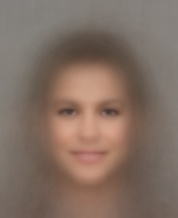

In [6]:
# Display average face

from PIL import Image as image

image.open('resultCeleb/average.jpg')

In [7]:
eigenFaces = []

for e in eigenVectors:
    face = e.reshape(size)
    eigenFaces.append(face)

In [8]:
from IPython.display import display, Image
from io import BytesIO
import random

def make(*args):
    
    output = average
     
    for i in range(10):
        
        slider[i] = cv2.getTrackbarPos(str(i), "Trackbars")
        weight = (slider[i] - 50) * 200
        output = np.add(output, eigenFaces[i] * weight)
 
    #output = cv2.resize(output, (0,0), fx=2, fy=2)
    #cv2.imshow("Result", output)
    cv2.imwrite('resultCeleb/output2.jpg', output)
    cv2.imshow('result', np.array(image.open('resultCeleb/output2.jpg')))

In [ ]:
cv2.namedWindow("Trackbars", cv2.WINDOW_AUTOSIZE)
cv2.imshow('result', np.array(image.open('resultCeleb/average.jpg')))
slider = []

for i in range(10):
    slider.append(50)
    cv2.createTrackbar(str(i), "Trackbars", 50, 100, make)

cv2.waitKey(0)
cv2.destroyAllWindows()